<h1> <b> Lab - 4 </b> </h1>
<br>
<h3>Linear Regression using PyTorch</h3>
<br>

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

<br/><h2> <b> Declare input features and targets. </b> </h2><br/>

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],[69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69,96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]],dtype='float32')

print("Inputs: \n",  inputs)
print("\nTargets: \n", targets)

Inputs: 
 [[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]
 [ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]
 [ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]

Targets: 
 [[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]
 [ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]
 [ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]


<br/><h2> <b> Convert inputs and targets to tensors. </b> </h2><br/>

In [ ]:
tensor_inputs = torch.from_numpy(inputs)
tensor_targets = torch.from_numpy(targets)

print("Tensored inputs: \n\n", tensor_inputs)
print("\nTensored targets: \n\n", tensor_targets)


Tensored inputs: 

 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Tensored targets: 

 tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


<br/><h2> <b> Split the data into training and testing data. </b> </h2><br/>

In [ ]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(tensor_inputs, tensor_targets, test_size = 0.25, random_state = 46)

<br/><h2> <b> Create a dataset using inputs and targets.  </b> </h2><br/>

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(inputs_train, targets_train)

<br/><h2> <b> Convert datasets into DataLoader.  </b> </h2><br/>

In [ ]:
train_loader = DataLoader(dataset = dataset)

<br/><h2> <b> Define the linear regression model </b> </h2><br/>

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()
    self.linear_input = nn.Linear(in_features=input_dim, out_features=256)
    self.linear_out = nn.Linear(in_features=256, out_features=output_dim)

  
  def forward(self,x):
    out = self.linear_input(x)
    out = self.linear_out(out)
    return out

In [ ]:
# Defining the hyperparameters.
INPUT_DIMENSION = 3
OUTPUT_DIMENSION = 2
LR = 0.0001

EPOCHS = 200

In [ ]:
model = LinearRegression(INPUT_DIMENSION, OUTPUT_DIMENSION)

<br/><h2> <b> Declare loss function.  </b> </h2><br/>

In [ ]:
LOSS_FN = nn.MSELoss()

<br/><h2> <b> Optimizers </b> </h2><br/>

In [ ]:
OPTIMIZER = torch.optim.Adam(model.parameters(), lr = LR)

<br/><h2> <b> Fit the data into model  </b> </h2><br/>

In [ ]:
def fit(lr, EPOCHS, LOSS_FN, OPTIMIZER, loader):
  converted_losses = []
  all_losses = []
  for i in range(EPOCHS):
    batch_losses = []
    for idx,(X,Y) in enumerate(loader):
      features = Variable(X).float()
      targets = Variable(Y).float()

      #  Forward pass
      predictions = lr(features)
      loss = LOSS_FN(predictions,targets)

      OPTIMIZER.zero_grad()
      loss.backward()
      OPTIMIZER.step()
      batch_losses.append(loss.data)
      all_losses.append(loss.data)
      # print(loss.data)
    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    converted_losses.append(mbl)
    if i%5==0:
      print("Epoch [{}/{}], Batch loss: {}".format(i, EPOCHS, mbl))
  return converted_losses
  

In [ ]:
losses = fit(model, EPOCHS, LOSS_FN, OPTIMIZER, train_loader)

Epoch [0/200], Batch loss: 92.81300354003906
Epoch [5/200], Batch loss: 52.11899948120117
Epoch [10/200], Batch loss: 34.13800048828125
Epoch [15/200], Batch loss: 24.530000686645508
Epoch [20/200], Batch loss: 19.836000442504883
Epoch [25/200], Batch loss: 17.070999145507812
Epoch [30/200], Batch loss: 14.87399959564209
Epoch [35/200], Batch loss: 12.963000297546387
Epoch [40/200], Batch loss: 11.253999710083008
Epoch [45/200], Batch loss: 9.720999717712402
Epoch [50/200], Batch loss: 8.354999542236328
Epoch [55/200], Batch loss: 7.151000022888184
Epoch [60/200], Batch loss: 6.377999782562256
Epoch [65/200], Batch loss: 5.827000141143799
Epoch [70/200], Batch loss: 5.340000152587891
Epoch [75/200], Batch loss: 4.9120001792907715
Epoch [80/200], Batch loss: 4.535999774932861
Epoch [85/200], Batch loss: 4.206999778747559
Epoch [90/200], Batch loss: 3.9179999828338623
Epoch [95/200], Batch loss: 3.6640000343322754
Epoch [100/200], Batch loss: 3.440000057220459
Epoch [105/200], Batch loss

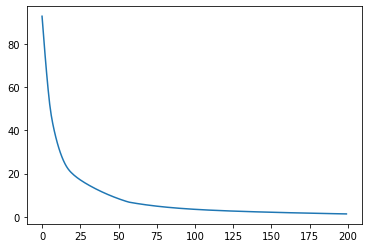

In [ ]:
plt.plot(losses)

<br/><h2> <b> Make prediction.  </b> </h2><br/>

In [ ]:
target_pred = model(inputs_test)

print("Predicted target: ", target_pred)

print("\n\nActual targets: ", targets_test)

Predicted target:  tensor([[ 82.3553,  99.3439],
        [ 82.3553,  99.3439],
        [119.4339, 135.8196],
        [ 57.4623,  70.5100]], grad_fn=<AddmmBackward0>)


Actual targets:  tensor([[ 81., 101.],
        [ 81., 101.],
        [119., 133.],
        [ 56.,  70.]])


In [ ]:
test_loss = LOSS_FN(target_pred, targets_test)
print("Test Loss",test_loss.detach().numpy())

Test Loss 2.4618814
